In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data/penguins.csv')
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


#### Q1

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Perfroming PCA with 2 & 4 components using only numeric columns(df.iloc[:,2:6])
pca2 = PCA(n_components=2)
x_pca2 = pca2.fit_transform(scaler.fit_transform(df.iloc[:,2:6].values))

pca4 = PCA(n_components=4)
x_pca4 = pca4.fit_transform(scaler.fit_transform(df.iloc[:,2:6].values))

In [4]:
features = []
for c in df.columns:
    if c != 'species':
        features.append(c)

print('Total Variance Captured by (2) Principle Components: {0}%'.format(pca2.explained_variance_ratio_.sum()*100.))

print('Total Variance Captured by (4) Principle Components: {0}%'.format(pca4.explained_variance_ratio_.sum()*100.))

Total Variance Captured by (2) Principle Components: 88.08682242049919%
Total Variance Captured by (4) Principle Components: 100.0%


#### Q2

#### a)

In [5]:
x_pca4_raw = pca4.fit_transform(df.iloc[:,2:6].values)

pca_raw = pd.DataFrame(data = x_pca4_raw ,columns = ['PC1', 'PC2','PC3', 'PC4'])
pca_raw['Sex']=df['sex'].values
pca_raw['Species']=df['species'].values

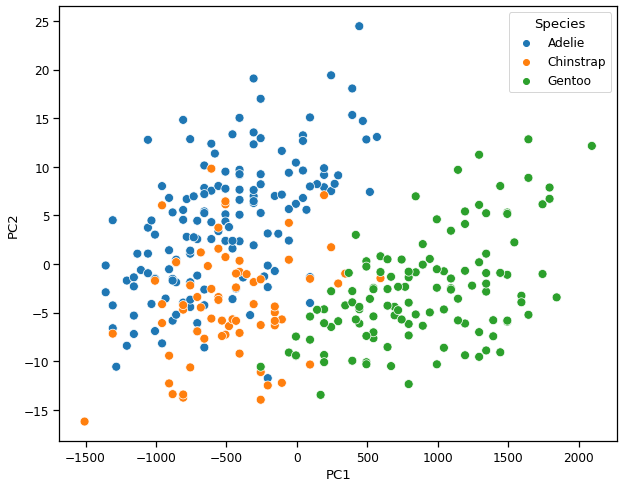

In [6]:
plt.figure(figsize=(10,8))
with sns.plotting_context("notebook",font_scale=1.1):
    sns.scatterplot(x="PC1", y="PC2",data=pca_raw, hue="Species",s=80)

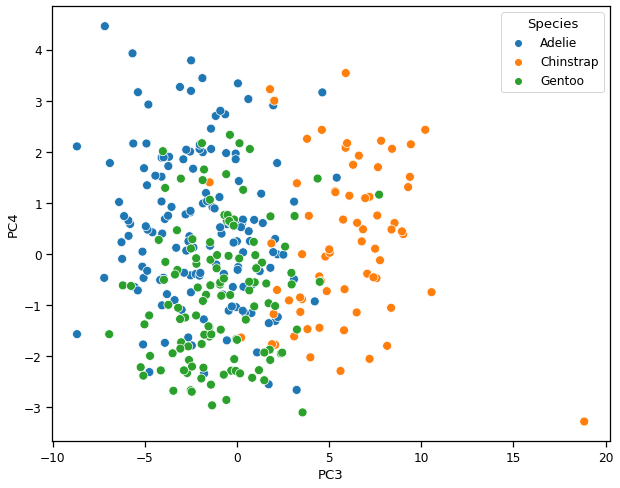

In [7]:
plt.figure(figsize=(10,8))
with sns.plotting_context("notebook",font_scale=1.1):
    sns.scatterplot(x="PC3", y="PC4",data=pca_raw, hue="Species",s=80)

#### b)

In [8]:
pca_stand = pd.DataFrame(data = x_pca4 ,columns = ['PC1', 'PC2','PC3', 'PC4'])
pca_stand['Sex']=df['sex'].values
pca_stand['Species']=df['species'].values

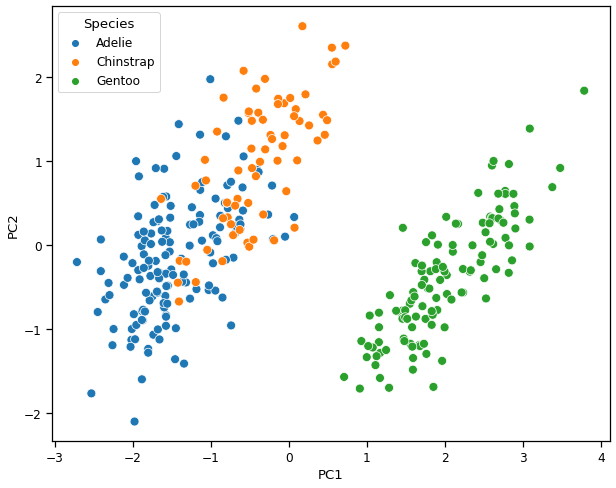

In [9]:
plt.figure(figsize=(10,8))
with sns.plotting_context("notebook",font_scale=1.1):
    sns.scatterplot(x="PC1", y="PC2",data=pca_stand, hue="Species",s=80)

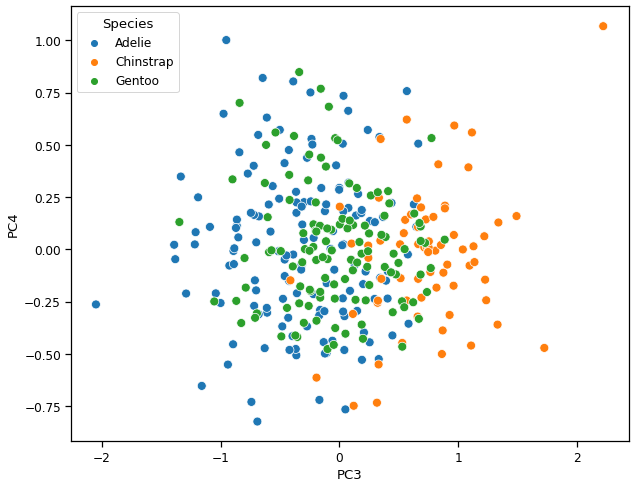

In [10]:
plt.figure(figsize=(10,8))
with sns.plotting_context("notebook",font_scale=1.1):
    sns.scatterplot(x="PC3", y="PC4",data=pca_stand, hue="Species",s=80)

The difference between the two PCA plots involving the first and second principle components is that there is more structure in the scaled PCA plot as the species are more clustered. This is not the case for both PCA plots involving the third and fourth principle components because the species could not be clustered.